# 10th Session

# The Solow Growth Model Part 2

## The Wrong Approach to Simulate This Model

In [1]:
import matplotlib.pyplot as plt
import numpy as np

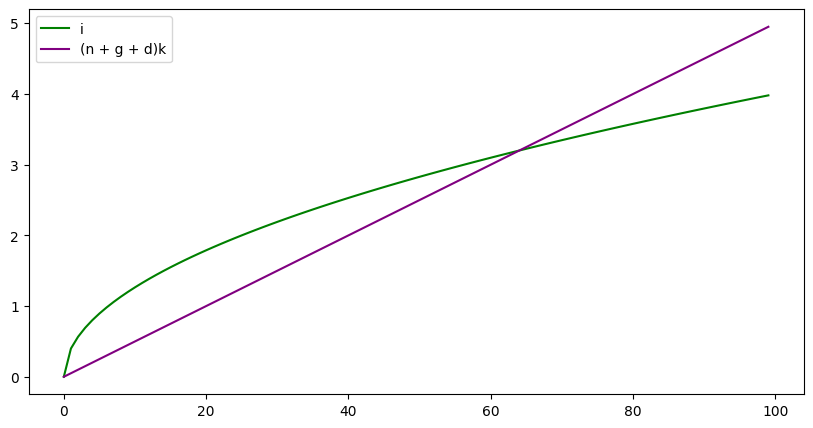

In [3]:
n = 0.01
g = 0.02
d = 0.02
s = 0.4
alpha = 0.5

def f(k):
    return k ** alpha

k = np.arange(0, 100)

k_dot = s * f(k) - (n + g + d) * k

plt.figure(figsize = (10, 5))
#plt.plot(k, f(k), color = "red")
plt.plot(k, s * f(k), color = "green", label = "i")
plt.plot(k, (n + g + d) * k, color = "purple", label = "(n + g + d)k")
plt.legend()
plt.show()

### The first problem with the setup above is that capital is not being generated from its dynamics, specifically from saving (which is equal to investment in this model) and depreciation. All periods are given which is not based on reality.

In [9]:
k 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

### The second problem is that we should use $\frac{K}{AL}$ (which is less than 1) instead of K itself, because the intensive form of the production function is based on the capital-to-effective labor ratio.

# Fred api

https://fred.stlouisfed.org/

create an account, then request for a key 

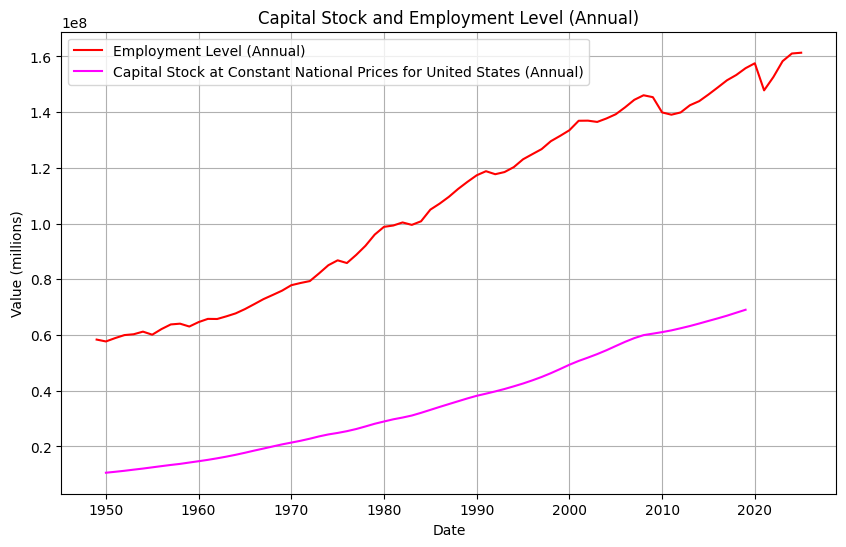

In [53]:
from fredapi import Fred
import pandas as pd

fred = Fred(api_key="a244a2465802a74eae545297e4057627")

Capital_Stock = fred.get_series("RKNANPUSA666NRUG")
employment_level = fred.get_series("CE16OV")

# Convert employment level to millions
employment_level_millions = employment_level * 1000
# converting monthly to annually 
employment_level_annual = employment_level_millions.resample('YE').mean()

plt.figure(figsize=(10, 6))
plt.plot(employment_level_annual, label='Employment Level (Annual)', color="red")
plt.plot(Capital_Stock, label='Capital Stock at Constant National Prices for United States (Annual)', color="magenta")
plt.ylabel('Value (millions)')
plt.xlabel('Date')
plt.title('Capital Stock and Employment Level (Annual)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


### If we assume that the capital stock and employment level are approximately 70 million and 161 million, respectively, and that $A = 1$ then $\frac{K}{AL}$ will be 0.43.

# The More Acceptable Approach

# Steps to Simulate a Solow Growth Model Using Python

## Step 1: Understanding The building blocks of the model

$k = \frac{K}{AL}$

**Production function is:** $f(k) = k^{\alpha} \text{, where } 0 < \alpha < 1$

**Evolution of capital is:** $\frac{\bigtriangleup K_{t}}{K_{t}} = \frac{[Y_{t} - C_{t}- \delta K_{t}]}{K_{t}}  \rightarrow \frac{\bigtriangleup K_{t}}{K_{t}} = \frac{sY_{t} - \delta K_{t}}{K_{t}} \text{, where s is saving rate and } 0 < s \leq 1$

**capital evolves based on investment and depreciation.** $\rightarrow K_{t+1} = K_{t} + \frac{\bigtriangleup K_{t}}{K_{t}}$

## Step 2: Understading The Dynamics of k

$\frac{\bigtriangleup k_{t}}{k_{t}} = sf(k_{t}) - (n + g + \delta)k_{t} \text{, where } (n + g + \delta)k_{t} \text{ is breakeven investmemnt }$



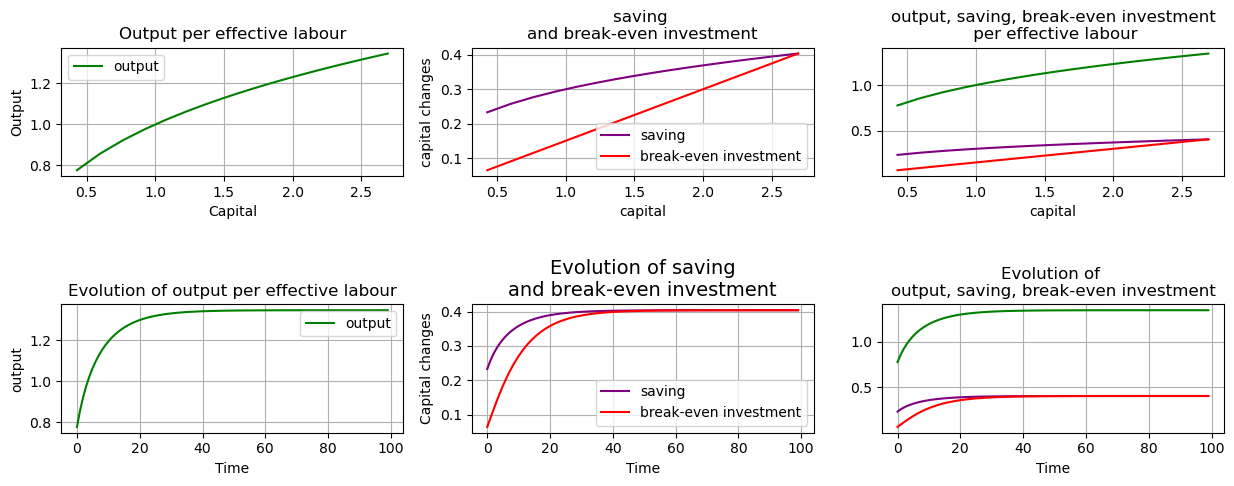

In [19]:
#parameters

saving_rate = 0.3
depreciation_rate = 0.1
growth_rate_of_population = 0.02
growth_rate_of_technology = 0.03
alpha = 0.3

#time periods
time_periods = 100
t = np.arange(time_periods)

#Evolution of other components through out the time 
capital = np.zeros(time_periods)
capital[0] = 0.43 #capital per effective labor

output = np.zeros(time_periods)
#output[0] = students said that the output is given in the first period, however only k is given because it is a state variable 
sfk = np.zeros(time_periods) #one of the assumption saving is equal to investment

#calculating

for time in range(time_periods):
    output[time] = capital[time] ** alpha
    sfk[time] = saving_rate * output[time]
    if time < time_periods - 1:
        capital_changes = sfk[time] - (growth_rate_of_population + growth_rate_of_technology + depreciation_rate) * capital[time]
        capital[time + 1] = capital[time] + capital_changes

fig = plt.figure(figsize = (15, 5))

ax1 = fig.add_subplot(2, 3, 1)
plt.plot(capital, output, color = "green", label = "output")
plt.title("Output per effective labour")
plt.xlabel("Capital")
plt.ylabel("Output")
plt.legend()
plt.grid()

ax2 = fig.add_subplot(2, 3, 2)
plt.title("saving \nand break-even investment")
plt.plot(capital, sfk, color = "purple", label = "saving")
plt.plot(capital, (growth_rate_of_population + growth_rate_of_technology + depreciation_rate) * capital, color = "red", label = "break-even investment")
plt.xlabel("capital")
plt.ylabel("capital changes")
plt.legend()
plt.grid()

ax3 = fig.add_subplot(2, 3, 3)
plt.plot(capital, output, color = "green")
plt.plot(capital, sfk, color = "purple")
plt.plot(capital, (growth_rate_of_population + growth_rate_of_technology + depreciation_rate) * capital, color = "red")
plt.title('output, saving, break-even investment\n per effective labour')
plt.xlabel("capital")
plt.grid()


ax4 = fig.add_subplot(2, 3, 4)
plt.plot(t, output, color = "green", label = "output")
plt.title('Evolution of output per effective labour')
plt.xlabel("Time")
plt.ylabel("output")
plt.legend()
plt.grid()

ax5 = fig.add_subplot(2, 3, 5)
plt.plot(t, sfk, color = "purple", label = "saving")
plt.plot(t, (growth_rate_of_population + growth_rate_of_technology + depreciation_rate) * capital, color = "red", label = "break-even investment")
plt.title('Evolution of saving\nand break-even investment', fontsize=14)
plt.xlabel("Time")
plt.ylabel("Capital changes")
plt.legend()
plt.grid()

ax6 = fig.add_subplot(2, 3, 6)
plt.plot(t, output, color = "green")
plt.plot(t, sfk, color = "purple")
plt.title('Evolution of \noutput, saving, break-even investment')
plt.plot(t, (growth_rate_of_population + growth_rate_of_technology + depreciation_rate) * capital, color = "red")
plt.xlabel("Time")
plt.grid()

plt.subplots_adjust(hspace=1) 
plt.show()

## 3rd step: Determining the steady states

At the steady state, the capital accumulation equation is:
$$sf(k^*) = (n + g + \delta)k^*$$

The steady state investment, $i^*$, is given by the saving function:
$$i^* = sf(k^*)$$

Substituting the production function $f(k) = k^{\alpha}$, we get:
$$i^* = sk^{*\alpha}$$

Solving for $k^*$, we get:
$$k^* = \left(\frac{s}{n + g + \delta}\right)^{\frac{1}{1-\alpha}}$$

Now, to find the steady state output $y^*$, we can plug in $k^*$ into the production function:
$$y^* = f(k^*) = (k^*)^{\alpha}$$

The steady state consumption, $c^*$, is given by the resource constraint:
$$c^* = f(k^*) - i^*$$

The term $(n + g + \delta)k^*$ represents the steady state break-even investment, which is the amount of investment required to maintain the capital stock at the steady state level.


k*: 2.6918003852647114
y*: 1.345900192632356
I*: 0.40377005778970676
c*: 0.9421301348426492
(n+d+g)k*: 0.40377005778970676


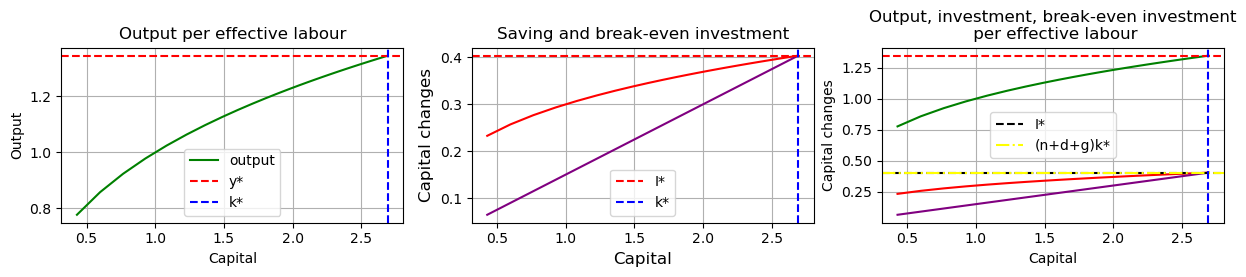

In [22]:
# Steady state values
capital_star = ((saving_rate) / (growth_rate_of_population + growth_rate_of_technology + depreciation_rate)) ** (1 / (1 - alpha))
output_star = (capital_star ** alpha)
saving_star = saving_rate * output_star #investment
consumption_star = output_star - saving_star
break_even_investment_star = (growth_rate_of_population + growth_rate_of_technology + depreciation_rate) * capital_star
print(f"k*: {capital_star}\ny*: {output_star}\nI*: {saving_star}\nc*: {consumption_star}\n(n+d+g)k*: {break_even_investment_star}")

# Update the plots
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(2, 3, 1)
plt.plot(capital, output, color="green", label="output")
plt.axhline(y=output_star, color='r', linestyle='--', label = 'y*')
plt.axvline(x=capital_star, color='b', linestyle='--', label = 'k*')
plt.title('Output per effective labour')
plt.xlabel('Capital')
plt.ylabel('Output')
plt.legend()
plt.grid()

ax2 = fig.add_subplot(2, 3, 2)
plt.plot(capital, sfk, color="red")
plt.plot(capital, (growth_rate_of_population + growth_rate_of_technology + depreciation_rate) * capital, color="purple")
plt.axhline(y=saving_star, color='r', linestyle='--', label = 'I*')
plt.axvline(x=capital_star, color='b', linestyle='--', label = 'k*')
plt.title('Saving and break-even investment')
plt.xlabel('Capital', fontsize=12)
plt.ylabel('Capital changes', fontsize=12)
plt.legend()
plt.grid()

ax3 = fig.add_subplot(2, 3, 3)
plt.plot(capital, output, color="green")
plt.plot(capital, sfk, color="red")
plt.plot(capital, (growth_rate_of_population + growth_rate_of_technology + depreciation_rate) * capital, color="purple")
plt.axhline(y=output_star, color='r', linestyle='--')
plt.axhline(y=saving_star, color='black', linestyle='--', label = "I*")
plt.axhline(y=break_even_investment_star, color='yellow', linestyle='-.', label = "(n+d+g)k*")
plt.axvline(x=capital_star, color='b', linestyle='--')
plt.title('Output, investment, break-even investment\n per effective labour')
plt.xlabel('Capital')
plt.ylabel('Capital changes')
plt.legend()
plt.grid()

# In the next session, we present the accurate approach for simulating solow model

# Quotes From Solow 1965, A contribution to the theory of economic growth:

- The available stock of capital is also a datum.
  
- The propensity to save tells us how much of net output will be saved and invested. Hence we know the net accumulation of capital during the current period. Added to the already accumulated stock this gives the capital available for the next period, and the whole process can be repeated.

- If the capital-labor ratio r* ($r = \frac{K}{L}$) should ever be established, it will be maintained, and capital and labor will grow thenceforward in proportion.

- By constant return to scale, real output will also grow at the same relative rate n and output per head of labor will be constant.

